In [ ]:
import numpy as np
from ice_interp import ice_interp_mod


# Define input values
lon = np.float64(255.070312500000)  # Interpolation point longitude (degrees)
lat = np.float64(74.4735717773438)  # Interpolation point latitude (degrees)


x_corners = np.array([253.978338312172, 254.698325218660, 256.152459376863, 255.464594303337], dtype=np.float64)
y_corners = np.array([74.4775053981321, 74.2803767364551, 74.6534788353970, 74.8496146897753], dtype=np.float64)
p = np.array([0.04222093679422526, 0.02939444349332336, 0.02361927128232367, 0.02457275269829678], dtype=np.float64)  # Values at the quadrilateral corners

# Prepare output variable
expected_obs = np.zeros(1, dtype=np.float64)

# this call is so init location_mod is called, and does all its print outs
expected_obs = ice_interp_mod.quad_idw_interp_f2py(
        lon, lat, x_corners, y_corners, p
)

print(f"Interpolated value at ({lon}, {lat}): {expected_obs}")

## Plot of interpolation over grid cell

Interpolated z value at (255.0703125, 74.4735717773438): 0.03081763984660563
 --------------------------------------
 Starting ... at YYYY MM DD HH MM SS = 
                 2025  4  4 10 20 49
 --------------------------------------

  set_nml_output No echo of NML values
  location_mod: using code with optimized cutoffs
  location_mod: Including vertical separation when computing distances:
  location_mod:        # pascals ~ 1 horiz radian:      100000.00000
  location_mod:         # meters ~ 1 horiz radian:       10000.00000
  location_mod:   # model levels ~ 1 horiz radian:          20.00000
  location_mod:  # scale heights ~ 1 horiz radian:           5.00000



NameError: name 'y_corner' is not defined

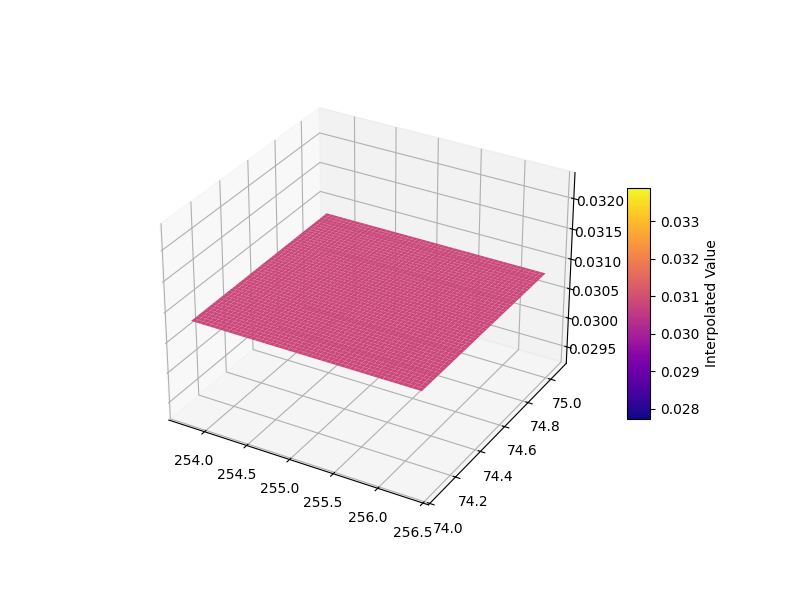

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ice_interp import ice_interp_mod

lon = np.float64(255.070312500000)  # Interpolation point longitude (degrees)
lat = np.float64(74.4735717773438)  # Interpolation point latitude (degrees)

x_corners = np.array([253.978338312172, 254.698325218660, 256.152459376863, 255.464594303337], dtype=np.float64)
y_corners = np.array([74.4775053981321, 74.2803767364551, 74.6534788353970, 74.8496146897753], dtype=np.float64)
p = np.array([0.04222093679422526, 0.02939444349332336, 0.02361927128232367, 0.02457275269829678], dtype=np.float64)  # Values at the quadrilateral corners

# Define Grid for Interpolation
x_min, x_max = min(x_corners), max(x_corners)
y_min, y_max = min(y_corners), max(y_corners)

# Add some padding to the grid range for better visualization
padding = 0.1 * (x_max - x_min)
grid_x, grid_y = np.meshgrid(
    np.linspace(x_min - padding, x_max + padding, 50),
    np.linspace(y_min - padding, y_max + padding, 50)
)
grid_z = np.zeros_like(grid_x)

# Compute IDW for Each Grid Point
for i in range(grid_x.shape[0]):
    for j in range(grid_x.shape[1]):
        grid_z[i, j] = expected_obs = ice_interp_mod.quad_idw_interp_f2py(grid_x[i,j], grid_y[i,j], x_corners, y_corners, p)

# Interpolated point
interpolated_point = (255.070312500000, 74.4735717773438)


# Calculate the interpolated z value for the given point
#interpolated_z = idw_interpolation_great_circle(x_known, y_known, z_known, interpolated_point[0], interpolated_point[1])
interpolated_z = ice_interp_mod.quad_idw_interp_f2py(interpolated_point[0], interpolated_point[1], x_corners, y_corners, p)
print(f"Interpolated z value at {interpolated_point}: {interpolated_z}")


# Plot the Results as a Surface
%matplotlib widget
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(grid_x, grid_y, grid_z, cmap='plasma', edgecolor='none')
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10, label="Interpolated Value")

# Add known points
ax.scatter(x_corners, y_corners, p, color='k', label="Known Points", s=50)

# Add the interpolated point
ax.scatter(
    interpolated_point[0], interpolated_point[1], interpolated_z,
    color='red', label=f"Interpolated Point (z={interpolated_z:.4f})", s=100
)

# Set labels and title
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("IDW Interpolation Surface")
plt.legend()
plt.show()